In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras

In [6]:
# Data Preparation
data = np.genfromtxt('iris_full.csv', 
                     delimiter=',', 
                     skip_header=1)
X = data[:,0:4]
y = data[:,4]

print(X[:10])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


In [8]:
# create model
model = keras.Sequential([keras.layers.Dense(units=1,
                                             activation='sigmoid',
                                             input_shape=[4])])

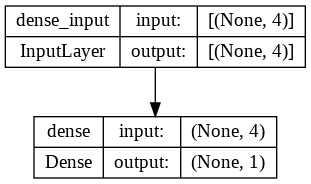

In [9]:
# Visualize model
from tensorflow.keras.utils import plot_model
plot_model(model, to_file="/content/my_model.png", show_shapes=True)

In [12]:
# compile
opt = keras.optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=opt,
              loss='binary_crossentropy')

# training
batch_size = 16
epochs = 200
history = model.fit(X, y, batch_size, epochs)

Epoch 1/200
7/7 [==============================] - 1s 2ms/step - loss: 1.2406
Epoch 2/200
7/7 [==============================] - 0s 4ms/step - loss: 1.0908
Epoch 3/200
7/7 [==============================] - 0s 3ms/step - loss: 1.0219
Epoch 4/200
7/7 [==============================] - 0s 3ms/step - loss: 0.9603
Epoch 5/200
7/7 [==============================] - 0s 3ms/step - loss: 0.9124
Epoch 6/200
7/7 [==============================] - 0s 2ms/step - loss: 0.8665
Epoch 7/200
7/7 [==============================] - 0s 3ms/step - loss: 0.8247
Epoch 8/200
7/7 [==============================] - 0s 3ms/step - loss: 0.7923
Epoch 9/200
7/7 [==============================] - 0s 3ms/step - loss: 0.7490
Epoch 10/200
7/7 [==============================] - 0s 3ms/step - loss: 0.7166
Epoch 11/200
7/7 [==============================] - 0s 3ms/step - loss: 0.6861
Epoch 12/200
7/7 [==============================] - 0s 3ms/step - loss: 0.6564
Epoch 13/200
7/7 [==============================] - 0s 3ms/st

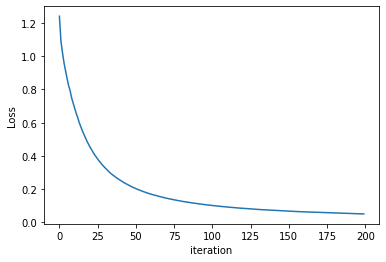

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.show()

In [21]:
# Evaluation
preds = model(X)
preds = preds.numpy()
preds = preds.round()

acc = np.mean(y==preds[:,0])
print(acc)

1.0


In [22]:
# parameters after training
print('weight-bias: \n', model.layers[0].get_weights())

weight-bias: 
 [array([[-0.49020445],
       [-0.87598324],
       [ 1.5865545 ],
       [ 1.5739038 ]], dtype=float32), array([-0.22857219], dtype=float32)]
